In [1]:
import geopandas as gpd

In [118]:
counties = gpd.read_file("C:\datasets\colorado_population.geojson")

In [119]:
counties.head()

,geoid,name,geometry
0,05000US08023,"Costilla County, CO","(POLYGON ((-105.738409 37.30676, -105.736221 3..."
1,05000US08057,"Jackson County, CO","(POLYGON ((-106.869827 40.956462, -106.87322 4..."
2,05000US08015,"Chaffee County, CO","(POLYGON ((-106.451867 38.698343, -106.450135 ..."
3,05000US08039,"Elbert County, CO","(POLYGON ((-104.662911 39.13184, -104.662808 3..."
4,05000US08119,"Teller County, CO","(POLYGON ((-105.328925 38.857561, -105.328153 ..."


In [120]:
data = gpd.pd.read_csv('C:\datasets\Population_Projections_in_Colorado.csv')

In [121]:
data_2015 = data[data['year']==2015]

In [122]:
data_2015.head(2)

,county,fipsCode,year,age,malePopulation,femalePopulation,totalPopulation,dataType
129136,Dolores,33,2015,98,0.000000,0.000000,0.00000,Estimate
148803,Adams,1,2015,0,3801.670505,3649.799424,7451.46993,Estimate


In [123]:
data_grouped = data_2015.groupby(['county','year'],as_index=False).sum().copy()

In [124]:
data_grouped.head(2)

,county,year,fipsCode,age,malePopulation,femalePopulation,totalPopulation
0,Adams,2015,101,5050,246667.305007,244161.694997,490829.000003
1,Alamosa,2015,303,5050,8020.533674,7987.466326,16008.000000


In [125]:
data_grouped = data_grouped[['county','year','totalPopulation']]

In [126]:
counties['name'].value_counts()

Fremont County, CO        1
Kiowa County, CO          1
La Plata County, CO       1
San Juan County, CO       1
Rio Blanco County, CO     1
Arapahoe County, CO       1
Montrose County, CO       1
Archuleta County, CO      1
Routt County, CO          1
Ouray County, CO          1
Moffat County, CO         1
Grand County, CO          1
Teller County, CO         1
Chaffee County, CO        1
Denver County, CO         1
Gunnison County, CO       1
San Miguel County, CO     1
Saguache County, CO       1
Clear Creek County, CO    1
Douglas County, CO        1
Kit Carson County, CO     1
Otero County, CO          1
Jefferson County, CO      1
Lake County, CO           1
Washington County, CO     1
Custer County, CO         1
Pitkin County, CO         1
Dolores County, CO        1
Delta County, CO          1
Boulder County, CO        1
                         ..
Crowley County, CO        1
Conejos County, CO        1
Larimer County, CO        1
Sedgwick County, CO       1
Weld County, CO     

In [127]:
for x in counties['name']:
    print type(str(x))

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>


In [128]:
counties.loc[0,'name']

u'Costilla County, CO'

In [129]:
counties['name'].apply(lambda x : str(x)[:-11])

0        Costilla
1         Jackson
2         Chaffee
3          Elbert
4          Teller
5         Prowers
6        Sedgwick
7          Denver
8      Rio Grande
9       Montezuma
10         Moffat
11        Conejos
12       La Plata
13        Dolores
14     Kit Carson
15           Weld
16          Kiowa
17       Saguache
18     Washington
19      Archuleta
20           Baca
21        Douglas
22         Pueblo
23          Eagle
24       Phillips
25     Rio Blanco
26          Routt
27         Summit
28          Adams
29          Logan
         ...     
34           Park
35       Huerfano
36           Bent
37    Clear Creek
38           Lake
39       Cheyenne
40     Las Animas
41         Custer
42        Alamosa
43           Yuma
44           Mesa
45          Grand
46          Ouray
47       Gunnison
48     San Miguel
49         Morgan
50        Larimer
51          Otero
52         Pitkin
53        Lincoln
54        Crowley
55       San Juan
56        Fremont
57      Jefferson
58       A

In [130]:
counties['name'] = counties['name'].apply(lambda x : str(x)[:-11])

In [131]:
counties.head()

,geoid,name,geometry
0,05000US08023,Costilla,"(POLYGON ((-105.738409 37.30676, -105.736221 3..."
1,05000US08057,Jackson,"(POLYGON ((-106.869827 40.956462, -106.87322 4..."
2,05000US08015,Chaffee,"(POLYGON ((-106.451867 38.698343, -106.450135 ..."
3,05000US08039,Elbert,"(POLYGON ((-104.662911 39.13184, -104.662808 3..."
4,05000US08119,Teller,"(POLYGON ((-105.328925 38.857561, -105.328153 ..."


In [132]:
len(data_grouped)

64

In [133]:
len(counties)

64

In [156]:
geo_data = gpd.GeoDataFrame(data_grouped.merge(counties, left_on='county',right_on='name'))

In [157]:
type(geo_data)

geopandas.geodataframe.GeoDataFrame

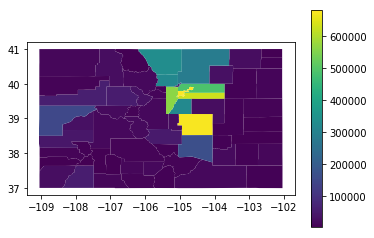

In [159]:
#This is the choropleth map with geopandas
geo_data.plot(column='totalPopulation',legend=True)

In [218]:
geo_data.to_file('C:\datasets\geo_data.geojson',driver="GeoJSON")

In [263]:
df2 = gpd.read_file('C:\datasets\geo_data.geojson')
df2.head(2)
#df2['geometry'][0][0].exterior.coords.xy[0]
#df2['geometry'][0][0].exterior.coords.xy[1]

,county,year,totalPopulation,geoid,name,geometry
0,Adams,2015,490829.000003,05000US08001,Adams,"(POLYGON ((-104.582488 39.739636, -104.884646 ..."
1,Alamosa,2015,16008.000000,05000US08003,Alamosa,"(POLYGON ((-106.039302 37.577067, -106.038413 ..."


In [170]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
mapbox_access_token = 'pk.eyJ1IjoiYW5kcmVzODkwMiIsImEiOiJjamNjYnFueWEwNmd4MzNybm1iZndpOGU0In0.6N-RqzOOEBjaR-7oG0TcGg'

In [266]:
data = go.Data([
    go.Scattermapbox(
        lat=['45.5017'],
        lon=['-73.5673'],
        mode='markers',
    )
])

In [267]:
layout = go.Layout(
    height=600,
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        layers=[
            dict(
                sourcetype = 'geojson',
                source = 'https://raw.githubusercontent.com/plotly/datasets/master/florida-red-data.json',
                type = 'fill',
                color = 'rgba(163,22,19,0.8)'
            ),
            dict(
                sourcetype = 'geojson',
                source = 'https://raw.githubusercontent.com/plotly/datasets/master/florida-blue-data.json',
                type = 'fill',
                color = 'rgba(40,0,113,0.8)'
            )
        ],
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=27.8,
            lon=-83
        ),
        pitch=0,
        zoom=5.2,
        style='light'
    ),
)


In [268]:
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [269]:
data2 = go.Data([
    go.Scattermapbox(
        lat=['45.5017'],
        lon=['-73.5673'],
        mode='markers',
    )
])

In [272]:
layout2 = go.Layout(
    height=600,
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        layers=[
            dict(
                sourcetype = 'geojson',
                source = 'http://catalog.civicdashboards.com/dataset/bae1d256-eb2b-4ece-b8dc-fa149b66a84e/resource/c9ddc844-6d01-4c7c-8c98-df932ea94597/download/2e3b193fffed4788a621b0095cd8182dtemp.geojson',
                type = 'fill',
                color = 'rgba(163,22,19,0.8)'
            )
        ],
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=37,
            lon=-105
        ),
        pitch=0,
        zoom=5.2,
        style='light'
    ),
)

In [273]:
fig2 = go.Figure(data=data2,layout=layout2)
iplot(fig2)